In [ ]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score

In [ ]:
# Step 1: Generate X values from 1 to 10
X = np.arange(1, 11).reshape(-1, 1)  # X values are from 1 to 10 (reshape for single feature)

# Step 2: Define y based on the condition
y = (X <= 5).astype(int)  # y = 1 if X <= 5, otherwise y = 0
df = pd.DataFrame(np.hstack((X, y)), columns=['X', 'y'])
df

,X,y
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


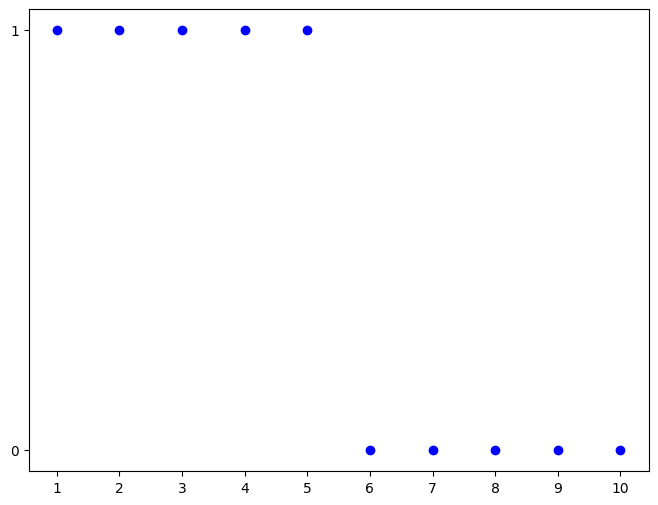

In [ ]:
plt.figure(figsize=(8, 6))

# Plot the data points
plt.scatter(X, y, color='blue', zorder=10)

plt.xticks(np.arange(1, 11, 1))
plt.yticks([0, 1], ['0', '1'])

plt.show()

In [ ]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make new predicitions
y_pred = model.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1])

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Select the second column
y_test=y_test.flatten()
y_pred=y_pred.flatten()

In [ ]:
pred_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'y_pred_prob': y_pred_proba})
pred_df

,y_test,y_pred,y_pred_prob
0,0,0,0.017996
1,1,1,0.982006


A More Detailed Model

In [ ]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
y = df['diagnosis']
X = df.drop(['id','diagnosis','Unnamed: 32'],axis=1)
# Step 4 : train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)
# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [ ]:
# Step 5 : select model
model = LogisticRegression(max_iter=5000)
# Step 6 : train or fit model
model.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [ ]:
model.intercept_

array([-29.58391239])

In [ ]:
model.coef_

array([[-0.90597782, -0.18609407,  0.24721421, -0.0250078 ,  0.13842091,
         0.19315729,  0.40679344,  0.21680326,  0.17140756,  0.03265703,
         0.0036999 , -1.19374202, -0.18408907,  0.12429131,  0.02295117,
        -0.04712512,  0.01883904,  0.02834839,  0.03143348, -0.01367418,
        -0.27718322,  0.4448271 ,  0.17809305,  0.01186369,  0.28327268,
         0.59658149,  1.03822148,  0.44051647,  0.52952041,  0.07644276]])

In [ ]:
y_pred = model.predict(X_test)
y_pred

array(['B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'M',
       'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B'], dtype=object)

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba.round(2)

array([0.14, 1.  , 0.99, 0.06, 1.  , 0.01, 1.  , 0.  , 1.  , 0.  , 0.03,
       0.72, 0.02, 1.  , 0.01, 0.  , 0.71, 0.  , 1.  , 0.03, 0.25, 0.  ,
       0.01, 0.01, 0.  , 1.  , 0.  , 0.02, 1.  , 0.  , 1.  , 0.  , 0.  ,
       0.  , 0.  , 1.  , 0.01, 0.  , 0.03, 0.82, 1.  , 0.99, 1.  , 1.  ,
       0.  , 0.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.  ,
       0.  , 0.  , 1.  , 1.  , 1.  , 0.  , 1.  , 0.01, 1.  , 1.  , 0.74,
       1.  , 0.  , 1.  , 0.78, 0.  , 0.52, 0.02, 0.96, 0.  , 1.  , 0.06,
       0.  , 1.  , 1.  , 0.99, 0.31, 0.01, 1.  , 1.  , 1.  , 0.05, 0.  ,
       0.42, 0.  , 0.99, 0.  , 0.13, 0.  , 0.76, 0.  , 0.99, 0.  , 0.22,
       1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.02, 1.  , 0.01,
       0.  , 0.  , 1.  , 0.02, 0.  , 0.  , 0.  , 1.  , 0.  , 0.03, 1.  ,
       0.05, 1.  , 0.  , 1.  , 0.8 , 0.03, 0.  , 0.  , 1.  , 1.  , 0.  ,
       0.99, 0.99, 1.  , 0.03, 0.  , 0.6 , 0.  , 1.  , 0.  , 1.  , 0.2 ,
       1.  , 0.  , 1.  , 0.  , 0.05, 0.58, 0.  , 1.

In [ ]:
pred_df = pd.DataFrame.from_dict(
    {'y_true': y_test,
     'y_pred': y_pred,
     'probability': y_pred_proba} )
pred_df

,y_true,y_pred,probability
513,B,B,0.138190
498,M,M,0.999998
512,M,M,0.993619
88,B,B,0.058820
33,M,M,1.000000
...,...,...,...
339,M,M,1.000000
61,B,B,0.000057
410,B,B,0.238422
291,B,B,0.195594


In [ ]:
# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
# Accuracy Score: 0.826816

print("Accuracy Score: %f" % accuracy)

Accuracy Score: 0.959064


In [ ]:
mapping = {1: 'B', 0: 'M'}
# y_test and y_pred are initially in string form ('B', 'M')
y_test = [1 if label == 'B' else 0 for label in y_test]
y_pred = [1 if label == 'B' else 0 for label in y_pred]


precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)
print("In other words, when the model predicts someone survived, it is correct %f of the time." % precision)

Precision Score: 0.979798
In other words, when the model predicts someone survived, it is correct 0.979798 of the time.


In [ ]:
recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)
print("In other words, it correctly identifies %f percent of all survivors" % recall)

Recall Score: 0.950980
In other words, it correctly identifies 0.950980 percent of all survivors


In [ ]:
from sklearn.metrics import f1_score

# F1 Score
f1_score(y_test, y_pred)

0.9651741293532339

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        69
           1       0.98      0.95      0.97       102

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



Text(66.25, 0.5, 'Actual')

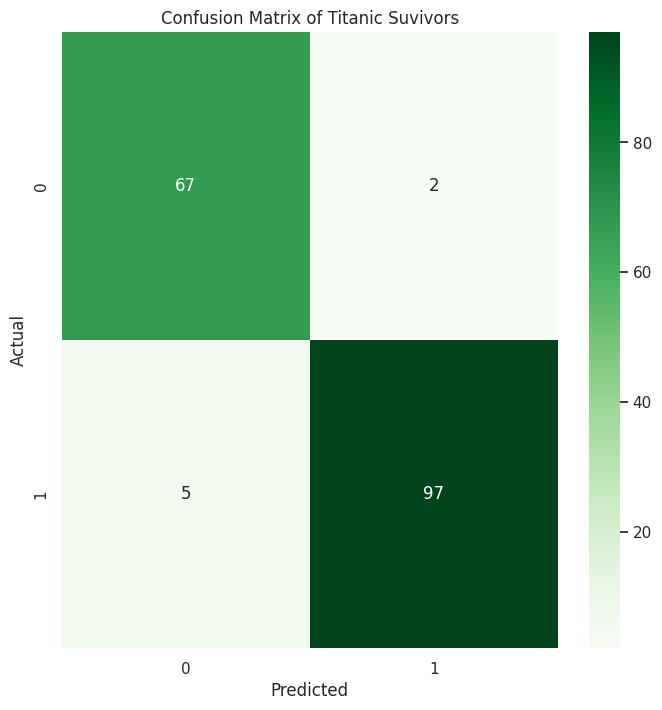

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Just rounding them so the numbers are easier to read
cm = cm.round(2)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.title("Confusion Matrix of Titanic Suvivors")
plt.xlabel('Predicted')
plt.ylabel('Actual')
